In [3]:
import imageio
import glob
import cv2

from PIL import Image
import numpy as np
import seaborn as sns

from matplotlib.patches import Rectangle
import matplotlib.pyplot as plt

import importlib
import data_generation
importlib.reload(data_generation)


<module 'data_generation' from '/home/mmenzyns/Repositories/thesis-ai-palm-rejection/data_processing/data_generation.py'>

In [4]:
from pathlib import Path
legal = data_generation.read_grayscale_pngs(Path('out/legal/orig'))
illegal = data_generation.read_grayscale_pngs(Path('out/illegal/orig'))


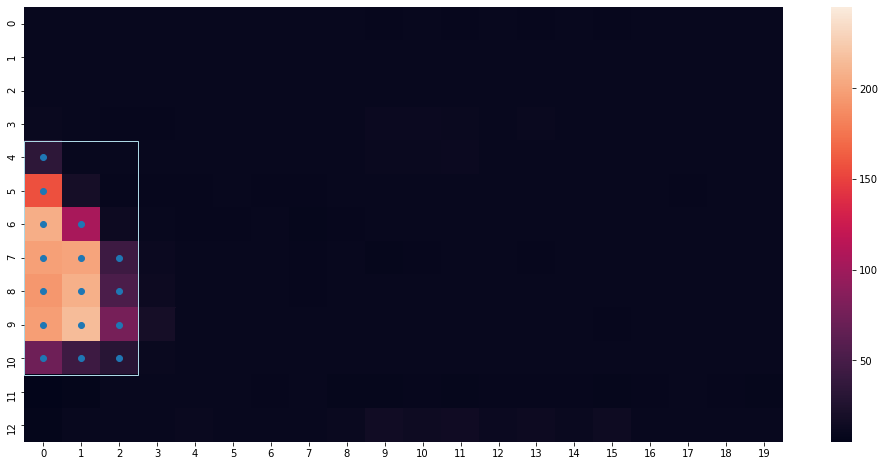

In [8]:
image = illegal[-110]
plt.figure(figsize=(17,8))
ax = sns.heatmap(image, vmax=245)

indices = np.fliplr(np.argwhere(image > 25)).T
ax.scatter(indices[0] + 0.5, indices[1] + 0.5)


# Get edges of values above 25 so a "no-go reactangle" can be created.
x_min = np.min(indices[0])
x_max = np.max(indices[0])

y_min = np.min(indices[1])
y_max = np.max(indices[1])

ax.add_patch(Rectangle((x_min, y_min), x_max - x_min + 1, y_max - y_min + 1, facecolor='None', edgecolor='lightblue'))

x_min, x_max, y_min, y_max

height, width = image.shape

range_of_movement = {
    '+x': width - x_max - 2     if x_min > 0 and x_max < width-1    else 0,
    '-x': x_min - 1             if x_min > 0 and x_max < width-1    else 0,
    '+y': height - y_max - 2    if y_min > 0 and y_max < height-1   else 0,
    '-y': y_min - 1             if y_min > 0 and y_max < height-1   else 0,
}

plt.savefig('data_generation_rectangle.pdf')

Text(0.5, 1.0, 'Rotation with shifting to center and rescaling')

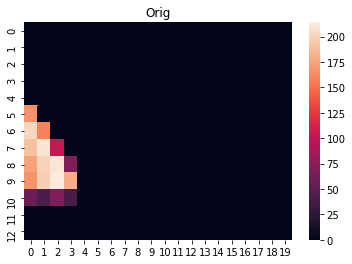

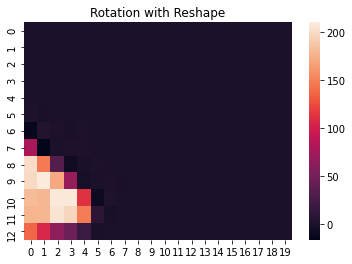

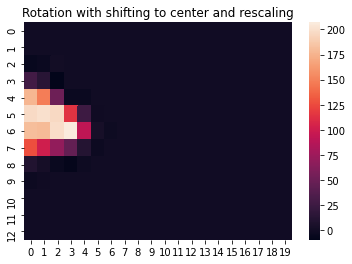

In [ ]:
# image = np.zeros(image.shape)
# image[2:4, 2:4] = 230
import operator
# image = np.zeros(image.shape)
# image[1] = 50
# image[2] = 150 
# image[3,-1] = 35
image = illegal[-610]


angle = 15
sns.heatmap(image)
plt.title("Orig")
plt.figure()
sns.heatmap(ndimage.rotate(image, angle, mode='nearest', reshape=False)) # BEST
plt.title("Rotation with Reshape")
plt.figure()
sns.heatmap(rotate_image(image, angle))
plt.title("Rotation with shifting to center and rescaling")

In [19]:
from scipy import ndimage

def weighted_average_index(image):
    # Values below 35 are not substantial and they mess with the average so replace them with zero
    image[image < 35] = 0
    total = np.sum(image) 

    if total == 0:
        return None

    val = 0
    for index, xsum in enumerate(np.sum(image, axis=0)):
        val += index * xsum
    xpos = val / total 

    val = 0
    for index, ysum in enumerate(np.sum(image, axis=1)):
        val += index * ysum
    ypos = val / total

    return xpos, ypos

def rotate_image_resize(image, angle, mode='nearest'):
    rotated = ndimage.rotate(image, angle, mode=mode)

    # Shift the image so the center is at the same place
    center_diff = tuple(map(operator.sub, weighted_average_index(image), weighted_average_index(rotated)))
    median_value = np.median(rotated)

    shifted = ndimage.shift(rotated, np.array([center_diff[1], center_diff[0]]), cval=median_value)

    # shape_diff = tuple(map(operator.sub, rotated.shape, image.shape))

    # Crop the image since it got bigger by rotation

    return Image.fromarray(shifted).resize(np.flip(image.shape))


def rotate_image_crop(image, angle, mode='nearest'):
    rotated = ndimage.rotate(image, angle, mode=mode)

    # Shift the image so the center is at the same place
    center_diff = tuple(map(operator.sub, weighted_average_index(image), weighted_average_index(rotated)))
    median_value = np.median(rotated)

    shifted = ndimage.shift(rotated, np.array([center_diff[1], center_diff[0]]), cval=median_value)

    shape_diff = tuple(map(operator.sub, rotated.shape, image.shape))

    # Crop the image since it got bigger by rotation# Crop the image since it got bigger by rotation
    return shifted[ : -shape_diff[0], : -shape_diff[1]]


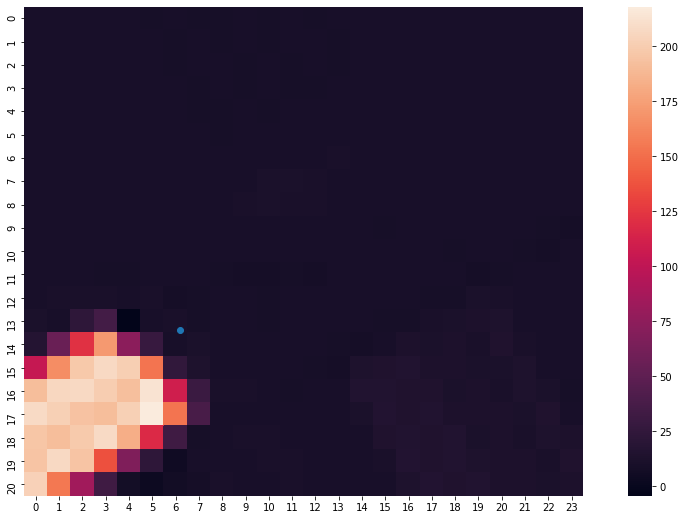

In [20]:
new_image = ndimage.rotate(image, 30, mode='nearest')
new_pos = weighted_average_index(new_image)
plt.figure(figsize=(16,9))
sns.heatmap(new_image, square=True)
plt.scatter(new_pos[0], new_pos[1])



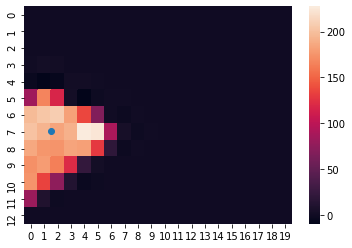

In [ ]:
difference = (pos[0] - new_pos[0], pos[1] - new_pos[1])
median_value = np.median(new_image)
shifted_image = ndimage.shift(new_image, np.array([difference[1], difference[0]]), cval=median_value)

shape = image.shape
new_shape = new_image.shape
shape_difference = (new_shape[0] - shape[0], new_shape[1] - shape[1])

corrected_image = shifted_image[:-shape_difference[0], :-shape_difference[1]]
sns.heatmap(corrected_image)
corrected_image_pos = weighted_average_index(corrected_image)
plt.scatter(corrected_image_pos[0], corrected_image_pos[1])


In [ ]:
pos, 

((1.0824858757062148, 7.793973634651601),)

In [ ]:
shape, new_shape, shape_difference

((13, 20), (21, 24), (8, 4))

In [ ]:
pos, new_pos

((1.5824858757062148, 8.2939736346516),
 (3.4076975227408712, 17.196124764172186))

<AxesSubplot:>

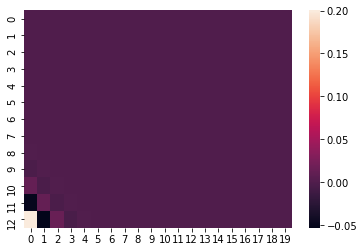

<AxesSubplot:>

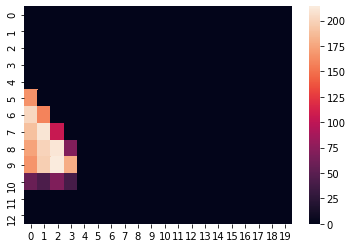

In [ ]:
sns.heatmap(image)


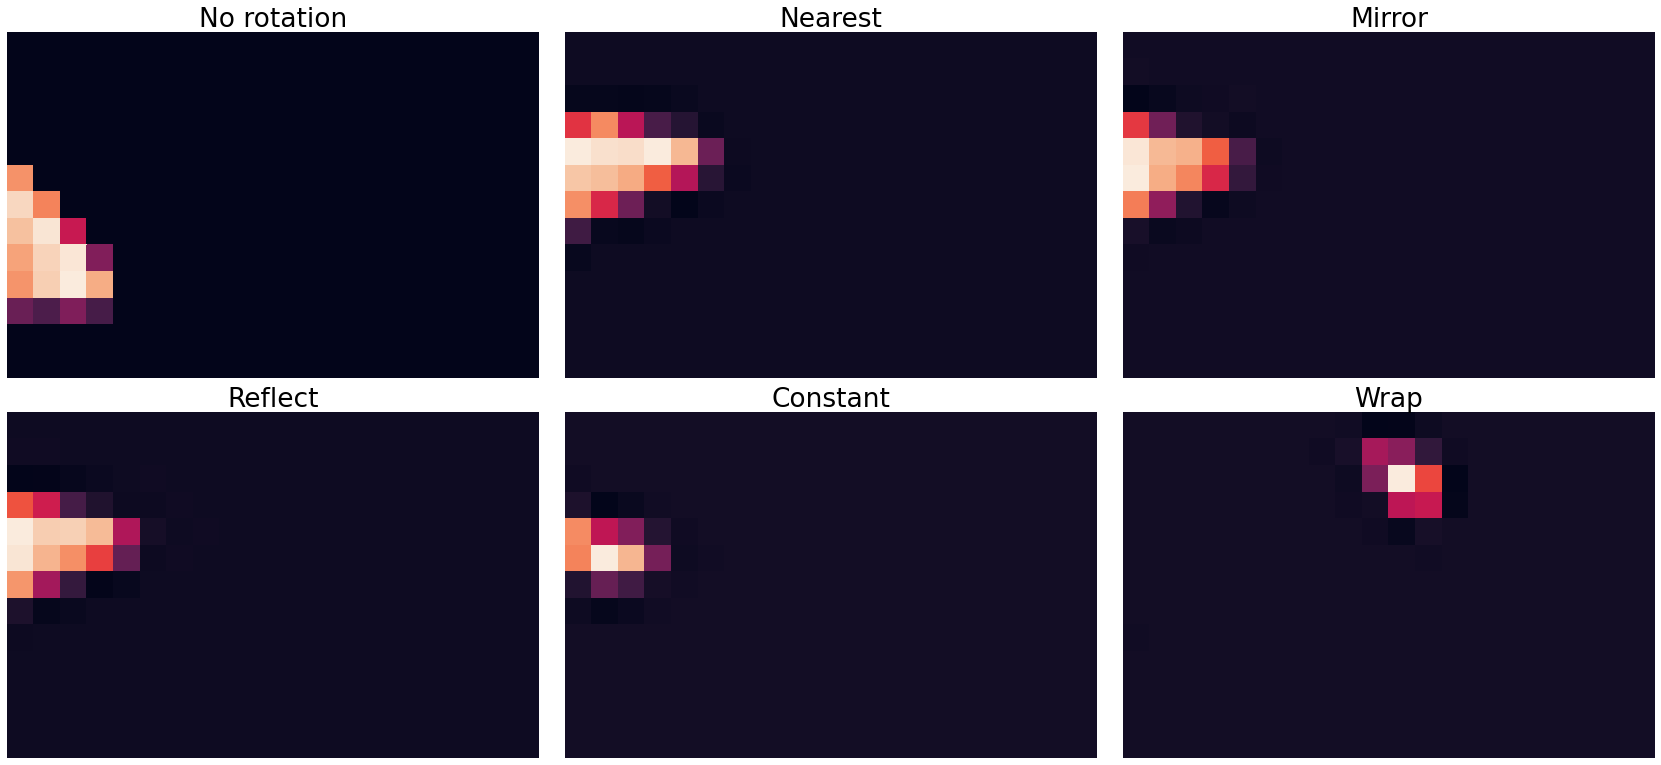

In [ ]:
angle = 30

plt.figure(figsize=(30,13))
plt.rcParams.update({'font.size': 22})

for i, mode in enumerate([None, 'Nearest', 'Mirror', 'Reflect', 'Constant', 'Wrap'], start=1):
    plt.subplot(2,3,i)
    if mode is None:
        sns.heatmap(image, xticklabels=0, yticklabels=0, square=True, cbar=False)
        plt.title("No rotation")
    else:
        sns.heatmap(rotate_image(image, angle, mode.lower()), xticklabels=0, yticklabels=0, square=True, cbar=False)
        plt.title(mode)

plt.subplots_adjust(hspace=0.1, wspace=0, top=0.90, right=0.9)
plt.savefig("rotation_modes.pdf")



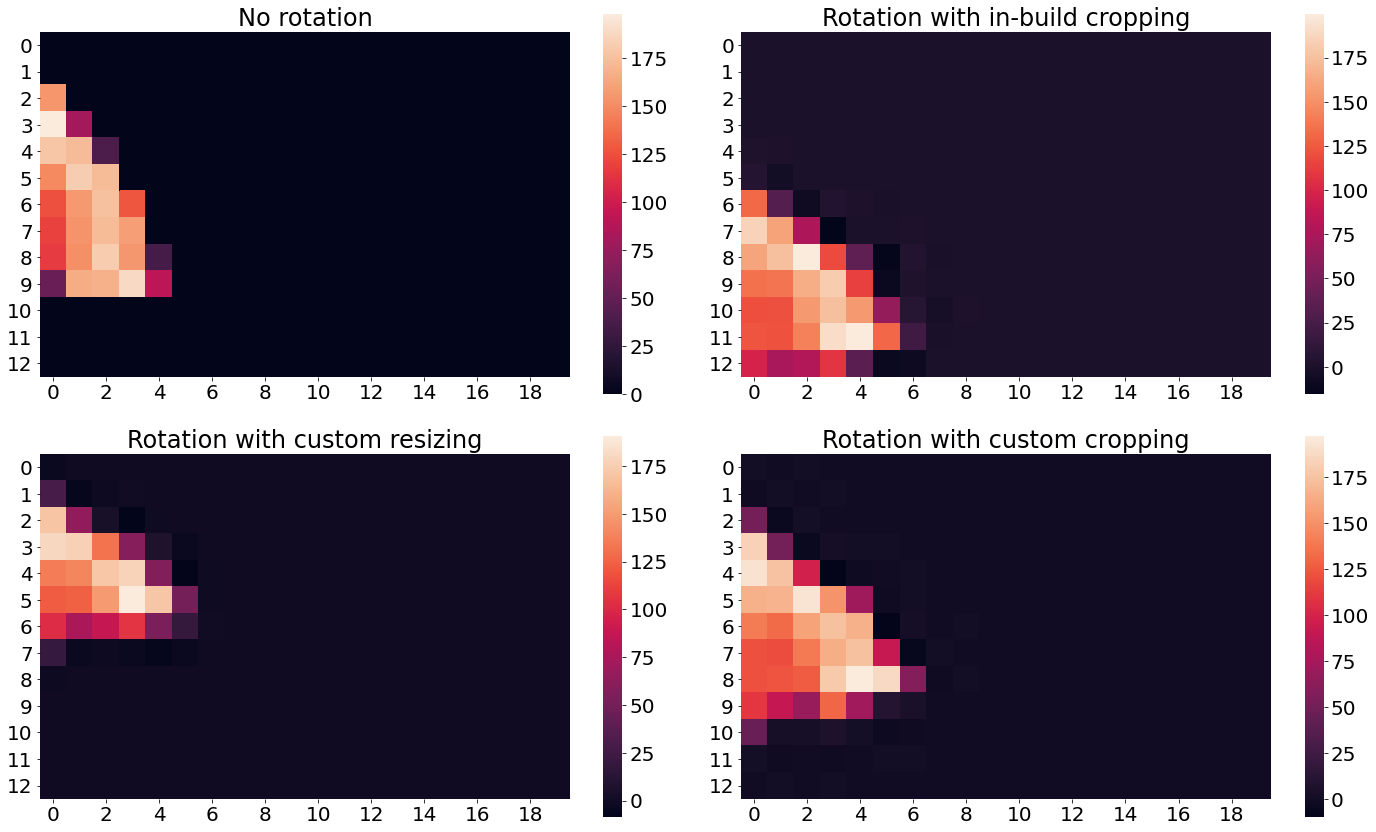

In [ ]:
plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(20,12))

image = illegal[400]

angle = 20
mode = 'nearest'

plt.subplot(2,2,1)
plt.title("No rotation")
sns.heatmap(image, square=True)

plt.subplot(2,2,2)
plt.title("Rotation with in-build cropping")
sns.heatmap(ndimage.rotate(image, angle, mode=mode, reshape=False), square=True)

plt.subplot(2,2,3)
plt.title("Rotation with custom resizing")
sns.heatmap(rotate_image_resize(image, angle, mode=mode), square=True)

plt.subplot(2,2,4)
plt.title("Rotation with custom cropping")
sns.heatmap(rotate_image_crop(image, angle, mode=mode), square=True)

plt.tight_layout()
plt.savefig('figures/rotation_resize_techniques.pdf')

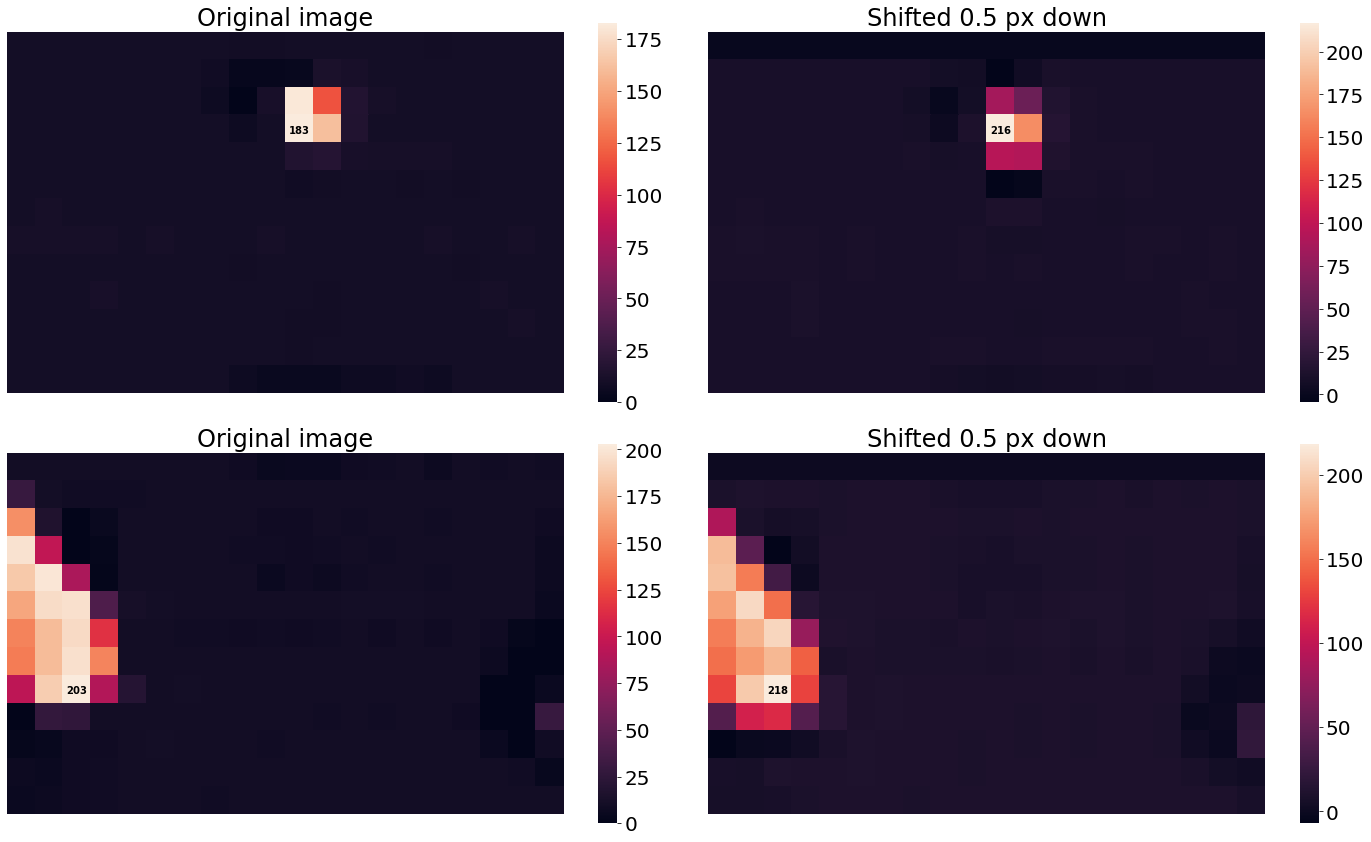

In [ ]:
 def show_max(image):
    max_val = np.max(image)
    max_val_indices = np.where(image == max_val)

    plt.text(max_val_indices[1]+0.5, max_val_indices[0]+0.65, str(int(max_val)), color="black", fontweight='bold', fontsize=10, ha="center")


image = legal[1050]

plt.figure(figsize=(20,12))
plt.rcParams.update({'font.size': 20})


plt.subplot(2,2,1)
plt.title("Original image")
sns.heatmap(image, square=True, xticklabels=0, yticklabels=0)
show_max(image)

plt.subplot(2,2,2)
plt.title("Shifted 0.5 px down")
half_shifted = ndimage.shift(image, (0.5,0))
sns.heatmap(half_shifted, square=True, xticklabels=0, yticklabels=0)
show_max(half_shifted)

image = illegal[1050]

plt.subplot(2,2,3)
plt.title("Original image")
sns.heatmap(image, square=True, xticklabels=0, yticklabels=0)
show_max(image)

plt.subplot(2,2,4)
plt.title("Shifted 0.5 px down")
half_shifted = ndimage.shift(image, (0.5,0))
sns.heatmap(half_shifted, square=True, xticklabels=0, yticklabels=0)
show_max(half_shifted)




plt.tight_layout()
plt.savefig('figures/shifting_half_pixel')

In [ ]:
len(legal)